## Naive Bayes
Naive Bayes is a supervised machine learning algorithm and used for classification problems. It is a probabilistic machine learning algorithm based on the `Bayes Theorem`. It has proven to not only be simple but also fast, accurate, and reliable and has been successfully used for many purposes, but it works particularly well with `Natural language processing` (NLP) problems. Some popular usecases of Naïve Bayes Algorithm are spam filtration, Sentimental analysis, and classifying articles.

### Types of Naïve Bayes Model:
There are three types of Naive Bayes Model, which are given below:
* **Bernoulli Naive Bayes** : It assumes that all our features are binary such that they take only two values. Means 0s can represent “word does not occur in the document” and 1s as "word occurs in the document" .
* **Multinomial Naive Bayes** : Its is used when we have discrete data (e.g. movie ratings ranging 1 and 5 as each rating will have certain frequency to represent). In text learning we have the count of each word to predict the class or label.
* **Gaussian Naive Bayes** : Because of the assumption of the normal distribution, Gaussian Naive Bayes is used in cases when all our features are continuous. For example in Iris dataset features are sepal width, petal width, sepal length, petal length. So its features can have different values in data set as width and length can vary. We can’t represent features in terms of their occurrences. This means data is continuous. Hence we use Gaussian Naive Bayes here.

The above explanation was copied from [Quora](https://www.quora.com/What-is-the-difference-between-the-the-Gaussian-Bernoulli-Multinomial-and-the-regular-Naive-Bayes-algorithms)

### Advantages of Naïve Bayes Classifier:
* Naïve Bayes is one of the fast and easy ML algorithms to predict a class of datasets.
* It can be used for Binary as well as Multi-class Classifications.
* It performs well in Multi-class predictions as compared to the other Algorithms.
* It is the most popular choice for text classification problems.

### Disadvantages of Naïve Bayes Classifier:
* Naive Bayes assumes that all features are independent or unrelated, so it cannot learn the relationship between features.

### Why is it called Naïve Bayes?
The Naïve Bayes algorithm is comprised of two words Naïve and Bayes, Which can be described as:

Naïve: It is called Naïve because it assumes that the occurrence of a certain feature is independent of the occurrence of other features. Such as if the fruit is identified on the bases of color, shape, and taste, then red, spherical, and sweet fruit is recognized as an apple. Hence each feature individually contributes to identify that it is an apple without depending on each other.

`Other Example` <br>
The thing that makes Naive Bayes so naive is that it treats all word orders the same, for example if the normal message score for the phrase, "Dear Friend" is "x" then it will be the exact same score for phrase "Friend Dear". In other words, regardless of how the words are ordered, we will get same score for each. Treating all word orders equal is very different from how we communicate. Every language has grammar rules and common phrases, but Naive Bayes ignores all of that stuff, instead Naive Bayes treats language like it just a bag full of words and each message is random handful of them. Naive Bayes ignore all the rules because keeping track of every single reasonable phrase in a language would be impossible. That said, even though Naive Bayes is naive, it tends to perform surprisingly well when separating Normal messages from spam. In machine learning lingo we'd say that by ignoring relationship among words, Naive Bayes has high bias but because it works well in practicem Naive Bayes has low variance.
> 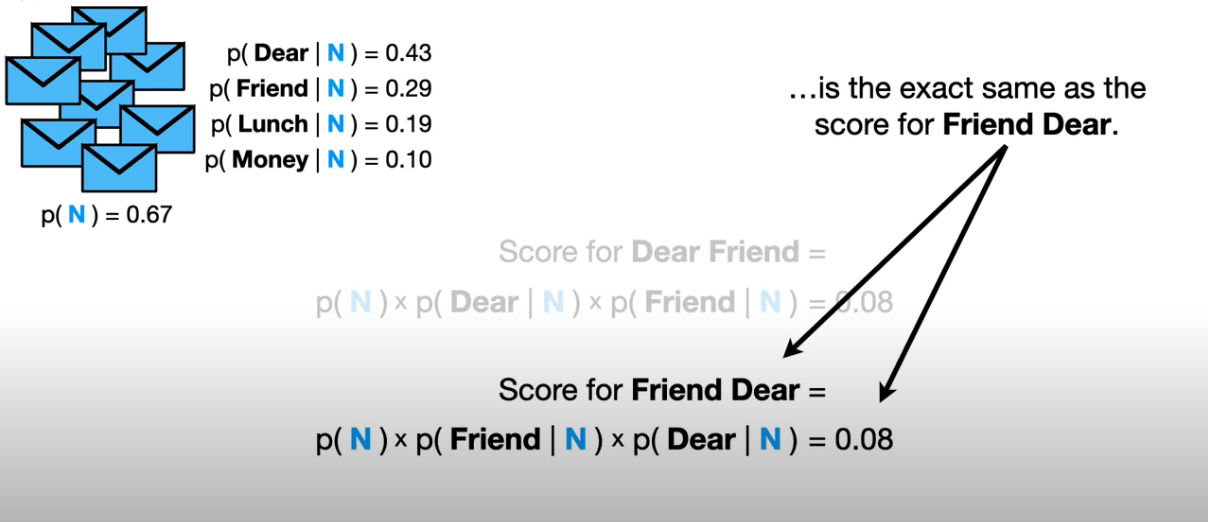
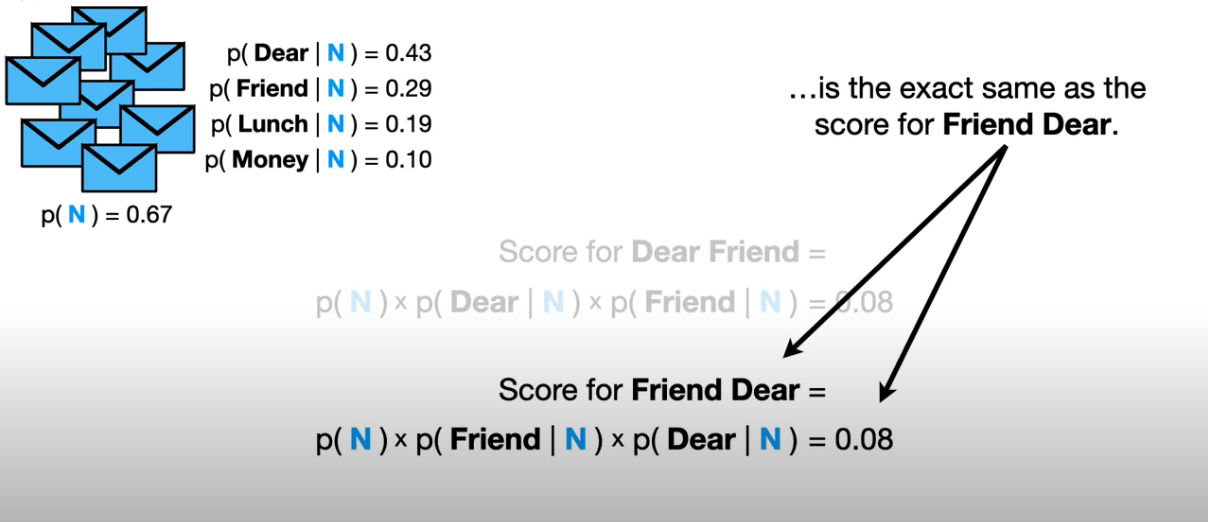

Bayes: It is called Bayes because it depends on the principle of Bayes' Theorem.

### Bayes Theorem
Bayes’ Theorem finds the probability of an event occurring given the probability of another event that has already occurred. Bayes’ theorem is stated mathematically as the following equation:
> 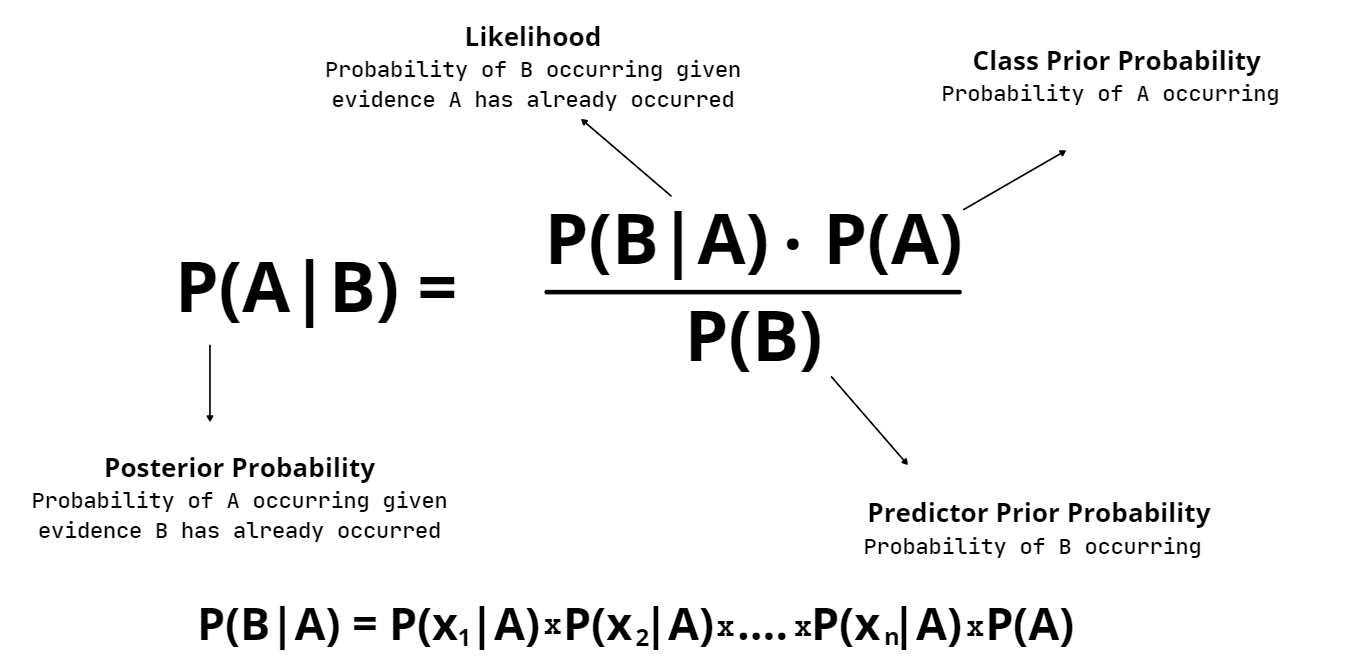 

Where `A` and `B` are events and `P(B)` ? 0.
* Basically, we are trying to find probability of event `A`, given the event `B` is true. Event `B` is also termed as evidence, these are our feature columns `x1, x2,...etc.`.
* `P(A)` is the priori of `A` (the prior probability, i.e. Probability of event before evidence is seen). The evidence is an attribute value of an unknown instance(here, it is event `B`).
* `P(B)` is Marginal Probability: Probability of Evidence.
* `P(A|B)` is a posteriori probability of `B`, i.e. probability of event after evidence is seen.

### How it works?
Suppose we have a dataset of weather conditions and corresponding target variable "Play". So using this dataset we need to decide that whether we should play or not on a particular day according to the weather conditions. This problem can be solved using `Multinomial Naive Bayes`. <br>
> 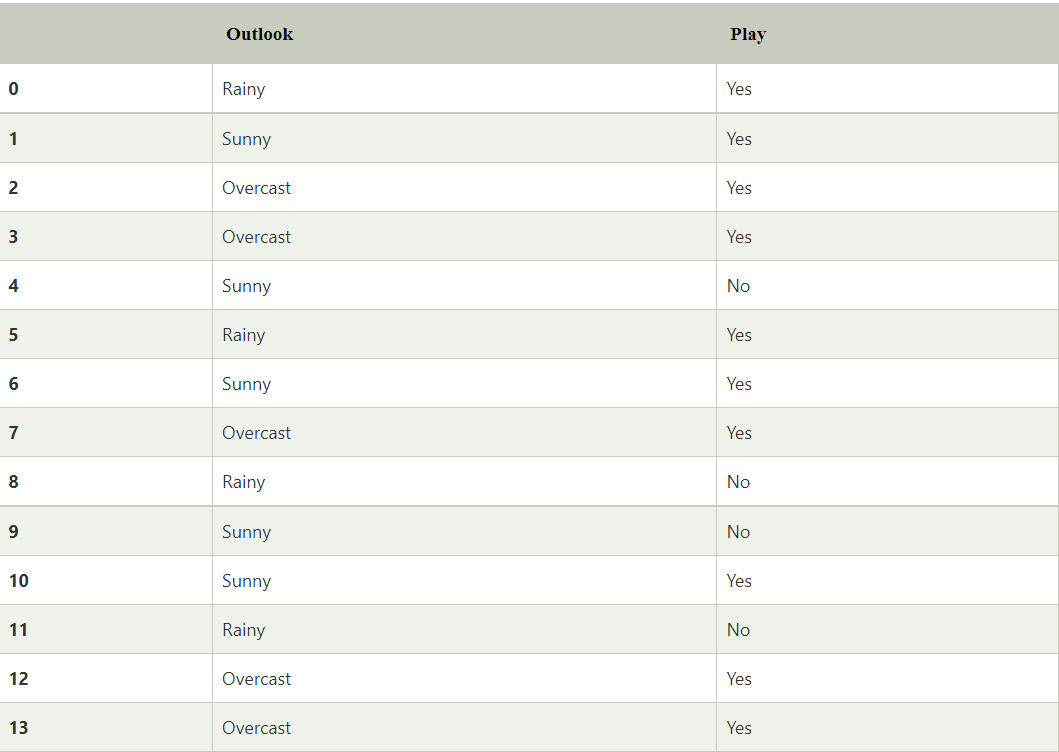

**So to solve this problem, we need to follow the below steps:**
* Convert the given dataset into frequency tables.
* Generate Likelihood table by finding the probabilities of given features.
* Now, use Bayes theorem to calculate the posterior probability.

> 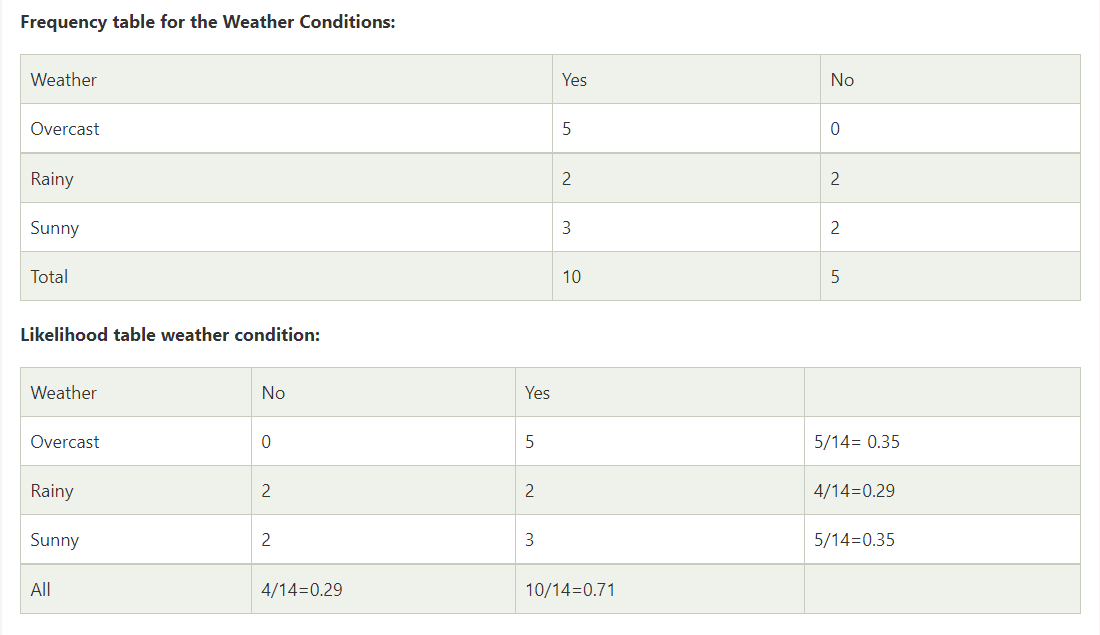

**Problem:** If the weather is sunny, then the Player should play or not?

**Solution:**
**Applying Bayes'theorem:**
```python
P(Yes|Sunny)= P(Sunny|Yes)*P(Yes)/P(Sunny)
P(Sunny|Yes)= 3/10= 0.3
P(Sunny)= 0.35
P(Yes)=0.71
So P(Yes|Sunny) = 0.3*0.71/0.35= 0.60
P(No|Sunny)= P(Sunny|No)*P(No)/P(Sunny)
P(Sunny|NO)= 2/4=0.5
P(No)= 0.29
P(Sunny)= 0.35
So P(No|Sunny)= 0.5*0.29/0.35 = 0.41
```

So as we can see from the above calculation that P(Yes|Sunny)>P(No|Sunny)
Hence on a Sunny day, Player can play the game.

To see the working of `Gaussian Naive Bayes`, watch this [video from StatQuest](https://www.youtube.com/watch?v=H3EjCKtlVog)

## Building Naive Bayes model

In [1]:
# importing required libraries
import pandas as pd # <-- for data handling
from sklearn.datasets import load_wine # <--- this is the data we will work on
from sklearn.naive_bayes import GaussianNB # <-- we will work with Gaussian Naive bayes as our features are continuos 
from sklearn.model_selection import train_test_split # <-- for splitting dataset 
from sklearn.metrics import confusion_matrix, classification_report # <-- for measuring model performance

In [18]:
data = load_wine()
df = pd.DataFrame(data.data, columns= data.feature_names)
df['target'] = data.target

df.sample(10, random_state=49)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
83,13.05,3.86,2.32,22.5,85.0,1.65,1.59,0.61,1.62,4.80,0.84,2.01,515.0,1
105,12.42,2.55,2.27,22.0,90.0,1.68,1.84,0.66,1.42,2.70,0.86,3.30,315.0,1
21,12.93,3.80,2.65,18.6,102.0,2.41,2.41,0.25,1.98,4.50,1.03,3.52,770.0,0
88,11.64,2.06,2.46,21.6,84.0,1.95,1.69,0.48,1.35,2.80,1.00,2.75,680.0,1
107,12.72,1.75,2.28,22.5,84.0,1.38,1.76,0.48,1.63,3.30,0.88,2.42,488.0,1
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
119,12.00,3.43,2.00,19.0,87.0,2.00,1.64,0.37,1.87,1.28,0.93,3.05,564.0,1
136,12.25,4.72,2.54,21.0,89.0,1.38,0.47,0.53,0.80,3.85,0.75,1.27,720.0,2
158,14.34,1.68,2.70,25.0,98.0,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660.0,2
110,11.46,3.74,1.82,19.5,107.0,3.18,2.58,0.24,3.58,2.90,0.75,2.81,562.0,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [20]:
# separating features and label
features = df.iloc[:, :-1]
label = df.iloc[:, -1]

print(features.shape, label.shape)

(178, 13) (178,)


In [22]:
# splitting train test dataset
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=54)
print(x_train.shape ,x_test.shape, y_train.shape, y_test.shape)

(142, 13) (36, 13) (142,) (36,)


In [23]:
# let's create our model
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [24]:
# let's test our model in test data
y_pred = model.predict(x_test)

In [25]:
# model accuracy
print('Confussion matrix\n', confusion_matrix(y_test, y_pred))
print('-'*20)
print("Model Accuracy Train\n", model.score(x_train, y_train), "\nModel Accuracy Test\n", model.score(x_test, y_test))
print('-'*20)
print('Classification Report', classification_report(y_test, y_pred))

Confussion matrix
 [[ 9  0  0]
 [ 0 13  0]
 [ 0  0 14]]
--------------------
Model Accuracy Train
 0.9859154929577465 
Model Accuracy Test
 1.0
--------------------
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        14

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



Gaussian Naive Bayes gave us genralized model with 100% accuracy.